# Which area would be most susceptible to extend Dezodbrand?



# Objective
What is the objective or goal that you are trying to accomplish? What is the decision that you must make?

####The goal of this project is to find through the data we searched  the best area in toronto we can extend the launch brand.this project can serve as a guide for any company to conduct market research for a product or extend a company .

# Hypothesis: Research Question?
 What is the question that you would like to answer in order to make a decision.

###they noticed that an area where the level of insecurity is high, people steal things, people are attacked, this area should not be the most convenient area


###Can insecurity in a neighborhood cause a sign of business failure??



# Data Source
Explain where did you get the data. How can you trust this data? Who produced this data and what were their motiviations?


#### For this project I found this information on on these websites information in order to get the right information that I need, to understand the data so that we can do a good analysis


#### Neighbourhoods crime rates

#### 1.  https://data.torontopolice.on.ca/datasets/neighbourhood-crime-rates-2020-1/explore?showTable=true

#### Shooting and Firearm Discharges
 
#### 2.   https://data.torontopolice.on.ca/datasets/shootings-and-firearm-discharges/explore?showTable=true


#### 3.Profile dataset

#### https://www.toronto.ca/city-government/data-research-maps/neighbourhoods-communities/neighbourhood-profiles/





# Data Cleaning
In this step you will prepare your data for analysis.

## Review data types
Inspect the dataset for the data types of each column.

## Analytical Transformations
Perform any transformation on the columns in the dataset to enable further analysis.

### Treatment of Missing Values
If there are any missing values, how do you plan to treat those data columns?

In [152]:
!pip install geopandas

     |████████████████████████████████| 994 kB 28.3 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 
     |████████████████████████████████| 6.3 MB 41.7 MB/s 


In [153]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt
import re as re
import seaborn as sns
import datetime as dt

import folium # map rendering library
import re
import geopandas as gpd # for spatial dataset
print('Libraries imported.')



Libraries imported.


In [2]:
#import folium and other library
from pandas.io.json import json_normalize
import folium
from geopy.geocoders import Nominatim 
import requests

In [3]:
Crime_rate=pd.read_csv("Neighbourhood_Crime_Rates_2020 2.csv")
shooting_firearm=pd.read_csv("Shootings_and_Firearm_Discharges.csv")
profile=pd.read_csv("neighbourhood_profiles_2016_csv.csv")

In [4]:
list_of_neig = profile.iloc[:,5:].T.index

In [5]:
#show the list
for neig in list_of_neig:
  print(neig)

City of Toronto
Agincourt North
Agincourt South-Malvern West
Alderwood
Annex
Banbury-Don Mills
Bathurst Manor
Bay Street Corridor
Bayview Village
Bayview Woods-Steeles
Bedford Park-Nortown
Beechborough-Greenbrook
Bendale
Birchcliffe-Cliffside
Black Creek
Blake-Jones
Briar Hill-Belgravia
Bridle Path-Sunnybrook-York Mills
Broadview North
Brookhaven-Amesbury
Cabbagetown-South St. James Town
Caledonia-Fairbank
Casa Loma
Centennial Scarborough
Church-Yonge Corridor
Clairlea-Birchmount
Clanton Park
Cliffcrest
Corso Italia-Davenport
Danforth
Danforth East York
Don Valley Village
Dorset Park
Dovercourt-Wallace Emerson-Junction
Downsview-Roding-CFB
Dufferin Grove
East End-Danforth
Edenbridge-Humber Valley
Eglinton East
Elms-Old Rexdale
Englemount-Lawrence
Eringate-Centennial-West Deane
Etobicoke West Mall
Flemingdon Park
Forest Hill North
Forest Hill South
Glenfield-Jane Heights
Greenwood-Coxwell
Guildwood
Henry Farm
High Park North
High Park-Swansea
Highland Creek
Hillcrest Village
Humber Heig

In [6]:
def get_gps(city,location_name):
  address = city+","+location_name
  geolocator = Nominatim(user_agent="tr_explorer")
  location = geolocator.geocode(address)
  latitude = None
  longitude = None
  if location:
      latitude = location.latitude
      longitude = location.longitude
  return dict(neighbourhood=location_name,longitude=longitude,latitude=latitude)




In [7]:
neighbourhoods = []
i=0
for neig in list_of_neig:
  neig_dict = get_gps(city="Toronto",location_name= neig)
  neighbourhoods.append(neig_dict)
  i+=1

In [8]:
# we create dataframe with neighbourhood
neighbourhoods =pd.DataFrame(data=neighbourhoods)
neighbourhoods.head()

,neighbourhood,longitude,latitude
0,City of Toronto,-79.383935,43.653482
1,Agincourt North,-79.266439,43.808038
2,Agincourt South-Malvern West,NaN,NaN
3,Alderwood,-79.545232,43.601717
4,Annex,-79.407117,43.670338


In [9]:
# we are searching long,lat for Alderwood
address = 'toronto,Alderwood'

geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6017173, -79.5452325.


In [10]:
neig=shooting_firearm[['Neighbourhood', 'Longitude', 'Latitude']]
neig.Neighbourhood = neig.Neighbourhood.apply(lambda x: str(x).split("(")[0]) 
neig.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(4857, 3)

In [11]:

CLIENT_ID = '5HTISOR0QNYSGW13WEECOYSMFGU5CUFSCFTV14U0STXANWUU' # your Foursquare ID
CLIENT_SECRET = '0N5TQM24WR3QJD4M5HTI1NVM2TSBW4WRSY0X4YAZMNGV5OSV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

In [12]:
neighborhood_latitude = neig.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neig.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = neig.loc[0, 'Neighbourhood'] # neighborhood name

In [13]:
toronto_latitude = neig.loc[0, 'Latitude'] # neighborhood latitude value
toronto_longitude = neig.loc[0, 'Longitude'] # neighborhood longitude value

toronto_name = neig.loc[0, 'Neighbourhood'] # nteighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(toronto_name, 
                                                               toronto_latitude, 
                                                               toronto_longitude))

Latitude and longitude values of Scarborough Village  are 43.74318039, -79.21887335.


In [14]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 20000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    toronto_latitude,
    toronto_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=5HTISOR0QNYSGW13WEECOYSMFGU5CUFSCFTV14U0STXANWUU&client_secret=0N5TQM24WR3QJD4M5HTI1NVM2TSBW4WRSY0X4YAZMNGV5OSV&v=20180605&ll=43.74318039,-79.21887335&radius=20000&limit=100'

In [15]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    i=0
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(i,name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        try:

          results = requests.get(url).json()["response"]['groups'][0]['items']
          
          # return only relevant information for each nearby venue
          venues_list.append([(
              name, 
              lat, 
              lng, 
              v['venue']['name'], 
              v['venue']['location']['lat'], 
              v['venue']['location']['lng'],  
              v['venue']['categories'][0]['name']) for v in results])
        except:
          pass
        i+=1

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
# here the average of neigh data
neig =neig.groupby(by="Neighbourhood").mean().reset_index()

In [18]:
neig

,Neighbourhood,Longitude,Latitude
0,Agincourt North,-79.264542,43.804733
1,Agincourt South-Malvern West,-79.260509,43.789325
2,Alderwood,-79.545571,43.603581
3,Annex,-79.399974,43.671030
4,Banbury-Don Mills,-79.347042,43.733355
...,...,...,...
132,Yonge-Eglinton,-79.401295,43.700041
133,Yonge-St.Clair,-79.394588,43.687481
134,York University Heights,-79.489869,43.763076
135,Yorkdale-Glen Park,-79.450716,43.718058


In [19]:
venues_of_toronto = getNearbyVenues(names=neig['Neighbourhood'],
                                   latitudes=neig['Latitude'],
                                   longitudes=neig['Longitude']
                                  )

0 Agincourt North 
1 Agincourt South-Malvern West 
2 Alderwood 
3 Annex 
4 Banbury-Don Mills 
5 Bathurst Manor 
6 Bay Street Corridor 
7 Bayview Village 
8 Bayview Woods-Steeles 
9 Bedford Park-Nortown 
10 Beechborough-Greenbrook 
11 Bendale 
12 Birchcliffe-Cliffside 
13 Black Creek 
14 Blake-Jones 
15 Briar Hill-Belgravia 
16 Bridle Path-Sunnybrook-York Mills 
17 Broadview North 
18 Brookhaven-Amesbury 
19 Cabbagetown-South St.James Town 
20 Caledonia-Fairbank 
21 Centennial Scarborough 
22 Church-Yonge Corridor 
23 Clairlea-Birchmount 
24 Clanton Park 
25 Cliffcrest 
26 Corso Italia-Davenport 
27 Danforth 
28 Danforth East York 
29 Don Valley Village 
30 Dorset Park 
31 Dovercourt-Wallace Emerson-Junction 
32 Downsview-Roding-CFB 
33 Dufferin Grove 
34 East End-Danforth 
35 Edenbridge-Humber Valley 
36 Eglinton East 
37 Elms-Old Rexdale 
38 Englemount-Lawrence 
39 Eringate-Centennial-West Deane 
40 Etobicoke West Mall 
41 Flemingdon Park 
42 Forest Hill North 
43 Forest Hill South 
4

In [20]:
#venues_of_toronto.to_csv('venues_of_toronto.csv')

In [21]:
venues_of_toronto.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt North,4,4,4,4,4,4
Agincourt South-Malvern West,11,11,11,11,11,11
Alderwood,5,5,5,5,5,5
Annex,40,40,40,40,40,40
Banbury-Don Mills,47,47,47,47,47,47
...,...,...,...,...,...,...
Yonge-Eglinton,27,27,27,27,27,27
Yonge-St.Clair,57,57,57,57,57,57
York University Heights,17,17,17,17,17,17


In [22]:
toronto_dummies = pd.get_dummies(venues_of_toronto[['Venue Category']], prefix="", prefix_sep="")




In [23]:
toronto_dummies.head()

,ATM,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Camera Store,...,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stationery Store,Steakhouse,Summer Camp,Supermarket,Sushi Restaurant,Syrian Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Transportation Service,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
# add neighborhood column back to dataframe
toronto_dummies['Neighborhood'] = venues_of_toronto['Neighborhood'] 




In [25]:
toronto_dummies['Neighborhood']

0                    Agincourt North 
1                    Agincourt North 
2                    Agincourt North 
3                    Agincourt North 
4       Agincourt South-Malvern West 
                    ...              
2340                              nan
2341                              nan
2342                              nan
2343                              nan
2344                              nan
Name: Neighborhood, Length: 2345, dtype: object

In [26]:
toronto_dummies.to_csv("my_toronto_dummies.csv")

In [27]:
#rename column Neighborhood
toronto_grouped = toronto_dummies.groupby('Neighborhood').sum().reset_index()
toronto_grouped.rename(columns={'Neighborhood':'Neighbourhood'}, inplace = True)
toronto_grouped.head(5)

,Neighbourhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,...,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stationery Store,Steakhouse,Summer Camp,Supermarket,Sushi Restaurant,Syrian Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Transportation Service,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Agincourt North,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Agincourt South-Malvern West,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Alderwood,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Annex,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Banbury-Don Mills,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [28]:
Crime_rate.head(3)

,OBJECTID,Neighbourhood,Hood_ID,F2020_Population_Projection,Assault_2014,Assault_2015,Assault_2016,Assault_2017,Assault_2018,Assault_2019,Assault_2020,Assault_Rate2014,Assault_Rate2015,Assault_Rate2016,Assault_Rate2017,Assault_Rate2018,Assault_Rate2019,Assault_Rate2020,AutoTheft_2014,AutoTheft_2015,AutoTheft_2016,AutoTheft_2017,AutoTheft_2018,AutoTheft_2019,AutoTheft_2020,AutoTheft_Rate2014,AutoTheft_Rate2015,AutoTheft_Rate2016,AutoTheft_Rate2017,AutoTheft_Rate2018,AutoTheft_Rate2019,AutoTheft_Rate2020,BreakAndEnter_2014,BreakAndEnter_2015,BreakAndEnter_2016,BreakAndEnter_2017,BreakAndEnter_2018,BreakAndEnter_2019,BreakAndEnter_2020,BreakAndEnter_Rate2014,BreakAndEnter_Rate2015,BreakAndEnter_Rate2016,BreakAndEnter_Rate2017,BreakAndEnter_Rate2018,BreakAndEnter_Rate2019,BreakAndEnter_Rate2020,Robbery_2014,Robbery_2015,Robbery_2016,Robbery_2017,...,RobberyRate_2015,Robbery_Rate2016,Robbery_Rate2017,Robbery_Rate2018,Robbery_Rate2019,Robbery_Rate2020,TheftOver_2014,TheftOver_2015,TheftOver_2016,TheftOver_2017,TheftOver_2018,TheftOver_2019,TheftOver_2020,TheftOver_Rate2014,TheftOver_Rate2015,TheftOver_Rate2016,TheftOver_Rate2017,TheftOver_Rate2018,TheftOver_Rate2019,TheftOver_Rate2020,Homicide_2014,Homicide_2015,Homicide_2016,Homicide_2017,Homicide_2018,Homicide_2019,Homicide_2020,Homicide_Rate2014,Homicide_Rate2015,Homicide_Rate2016,Homicide_Rate2017,Homicide_Rate2018,Homicide_Rate2019,Homicide_Rate2020,Shootings_2014,Shootings_2015,Shootings_2016,Shootings_2017,Shootings_2018,Shootings_2019,Shootings_2020,Shooting_Rate2014,Shootings_Rate2015,Shootings_Rate2016,Shootings_Rate2017,Shootings_Rate2018,Shootings_Rate2019,Shootings_Rate2020,Shape__Area,Shape__Length
0,1,Yonge-St.Clair,97,14083,16,25,34,25,28,35,23,127.0144,196.1246,262.5482,189.1790,207.2846,253.8071,163.3175,2,3,7,2,6,6,9,15.8768,23.53495,54.05405,15.13432,44.41812,43.50979,63.90684,37,20,12,18,24,28,26,293.7207,156.8997,92.66409,136.2088,177.6725,203.0457,184.6198,4,1,6,1,...,7.844983,46.33205,7.567159,7.40302,29.00653,35.50380,3,5,7,0,3,6,3,23.81519,39.22491,54.05405,0.0000,22.20906,43.50979,21.30228,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0,0,1,0,0,0,0,0.000000,0.0,7.722008,0.00000,0.000000,0.00000,0.000000,1.161315e+06,5873.270507
1,2,York University Heights,27,30277,273,298,363,351,362,382,341,950.5571,1041.4850,1269.3200,1211.0970,1230.3300,1279.8610,1126.2670,106,100,106,89,91,147,184,369.0808,349.49150,370.65530,307.08720,309.28190,492.51180,607.72200,108,140,98,105,122,111,105,376.0446,489.2881,342.68130,362.2938,414.6416,371.8967,346.7979,58,85,70,76,...,297.067800,244.77240,262.231700,319.47800,281.43530,155.23340,30,46,38,40,38,31,43,104.45680,160.76610,132.87640,138.0167,129.15070,103.86300,142.02200,1,0,2,0,1,0,1,3.481894,0.0,6.993496,0.0,0.0,0.0,3.302837,2,0,4,10,8,6,12,6.963789,0.0,13.986990,34.50417,27.189610,20.10252,39.634040,1.324666e+07,18504.777616
2,3,Lansing-Westgate,38,18146,42,81,67,84,68,70,97,261.0966,494.6263,400.6698,492.5531,390.1543,393.5901,534.5530,17,22,26,26,16,30,44,105.6820,134.34290,155.48380,152.45690,91.80102,168.68150,242.47770,34,27,41,42,50,39,39,211.3639,164.8754,245.18600,246.2765,286.8782,219.2859,214.9234,12,6,6,14,...,36.638980,35.88087,82.092180,183.60200,67.47259,60.61942,4,5,5,11,6,10,9,24.86634,30.53249,29.90073,64.5010,34.42538,56.22716,49.59771,0,0,0,0,10,0,0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0,0,1,0,1,2,1,0.000000,0.0,5.980146,0.00000,5.737564,11.24543,5.510856,5.346186e+06,11112.109419


In [29]:
# select the Assault ones
crime_list=Crime_rate[['Neighbourhood','Assault_Rate2014','Assault_Rate2015','Assault_Rate2016','Assault_Rate2017','Assault_Rate2018','Assault_Rate2019','Assault_Rate2020']]

In [30]:
crime_list.head(2)

,Neighbourhood,Assault_Rate2014,Assault_Rate2015,Assault_Rate2016,Assault_Rate2017,Assault_Rate2018,Assault_Rate2019,Assault_Rate2020
0,Yonge-St.Clair,127.0144,196.1246,262.5482,189.179,207.2846,253.8071,163.3175
1,York University Heights,950.5571,1041.4850,1269.3200,1211.097,1230.3300,1279.8610,1126.2670


In [31]:
# sum of all the Assault column
sum_Assault = crime_list['Assault_Rate2014'] + crime_list['Assault_Rate2015'] + crime_list['Assault_Rate2016']+ crime_list['Assault_Rate2017'] + crime_list['Assault_Rate2018'] + crime_list['Assault_Rate2019'] + crime_list['Assault_Rate2020']
crime_list['total_Assault']=sum_Assault/7
crime_list.head(2)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Neighbourhood,Assault_Rate2014,Assault_Rate2015,Assault_Rate2016,Assault_Rate2017,Assault_Rate2018,Assault_Rate2019,Assault_Rate2020,total_Assault
0,Yonge-St.Clair,127.0144,196.1246,262.5482,189.179,207.2846,253.8071,163.3175,199.896486
1,York University Heights,950.5571,1041.4850,1269.3200,1211.097,1230.3300,1279.8610,1126.2670,1158.416729


In [32]:
# select the Robbery ones
robery_lis=Crime_rate[['Neighbourhood','Robbery_Rate2014','RobberyRate_2015','Robbery_Rate2016','Robbery_Rate2017','Robbery_Rate2018','Robbery_Rate2019','Robbery_Rate2020']]

In [33]:
robery_lis.head(2)

,Neighbourhood,Robbery_Rate2014,RobberyRate_2015,Robbery_Rate2016,Robbery_Rate2017,Robbery_Rate2018,Robbery_Rate2019,Robbery_Rate2020
0,Yonge-St.Clair,31.75359,7.844983,46.33205,7.567159,7.40302,29.00653,35.5038
1,York University Heights,201.94990,297.067800,244.77240,262.231700,319.47800,281.43530,155.2334


In [34]:
#sum of all the Roberry column
sum_robery = robery_lis['Robbery_Rate2014'] + robery_lis['RobberyRate_2015'] + robery_lis['Robbery_Rate2016']+ robery_lis['Robbery_Rate2017'] + robery_lis['Robbery_Rate2018'] + robery_lis['Robbery_Rate2019'] + robery_lis['Robbery_Rate2020']
robery_lis['total_mean_robery']=sum_robery/7
robery_lis.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Neighbourhood,Robbery_Rate2014,RobberyRate_2015,Robbery_Rate2016,Robbery_Rate2017,Robbery_Rate2018,Robbery_Rate2019,Robbery_Rate2020,total_mean_robery
0,Yonge-St.Clair,31.75359,7.844983,46.33205,7.567159,7.40302,29.00653,35.5038,23.630162
1,York University Heights,201.94990,297.067800,244.77240,262.231700,319.47800,281.43530,155.2334,251.738357


In [35]:
merge = pd.merge(robery_lis,crime_list ,how = 'left',on= ['Neighbourhood'])

In [36]:
merge.head(2)

,Neighbourhood,Robbery_Rate2014,RobberyRate_2015,Robbery_Rate2016,Robbery_Rate2017,Robbery_Rate2018,Robbery_Rate2019,Robbery_Rate2020,total_mean_robery,Assault_Rate2014,Assault_Rate2015,Assault_Rate2016,Assault_Rate2017,Assault_Rate2018,Assault_Rate2019,Assault_Rate2020,total_Assault
0,Yonge-St.Clair,31.75359,7.844983,46.33205,7.567159,7.40302,29.00653,35.5038,23.630162,127.0144,196.1246,262.5482,189.179,207.2846,253.8071,163.3175,199.896486
1,York University Heights,201.94990,297.067800,244.77240,262.231700,319.47800,281.43530,155.2334,251.738357,950.5571,1041.4850,1269.3200,1211.097,1230.3300,1279.8610,1126.2670,1158.416729


In [37]:
merge=merge[['Neighbourhood','total_Assault','total_mean_robery']]
merge

,Neighbourhood,total_Assault,total_mean_robery
0,Yonge-St.Clair,199.896486,23.630162
1,York University Heights,1158.416729,251.738357
2,Lansing-Westgate,423.891886,77.272153
3,Yorkdale-Glen Park,998.988529,203.517086
4,Stonegate-Queensway,332.892414,72.970370
...,...,...,...
135,Pleasant View,282.978500,72.688101
136,Wychwood,457.792814,96.485607
137,Leaside-Bennington,196.726486,45.342161
138,Briar Hill-Belgravia,555.819800,145.090817


In [38]:
profile['Characteristic']= profile['Topic']+" "+ profile['Characteristic']

In [39]:
profile.head(4)

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,...,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Information Neighbourhood Number,NaN,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,...,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Information TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,No Designation,NIA,No Designation,No Designation,No Designation,NIA,NIA,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,...,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,NIA,NIA,NIA,No Designation,No Designation,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,NIA,NIA,No Designation,No Designation,NIA,No Designation,NIA,No Designation,Emerging Neighbourhood,NIA,NIA,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population and dwellings Population, 2016","2,731,571","29,113","23,757","12,054","30,526","27,695","15,873","25,797","21,396","13,154","23,236","6,577","29,960","22,291","21,737","7,727","14,257","9,266","11,499","17,757","11,669","9,955","10,968","13,362","31,340","26,984","16,472","15,935","14,133","9,666","17,180","27,051","25,003","36,625","35,052","11,785","21,381","15,535","22,776","9,456","2

In [40]:
profile1 = profile.drop(columns=['_id','Category','Topic','Data Source'])

In [41]:
profile1.head()

,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,...,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,Neighbourhood Information Neighbourhood Number,NaN,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,...,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
1,Neighbourhood Information TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,No Designation,NIA,No Designation,No Designation,No Designation,NIA,NIA,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,...,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,NIA,NIA,NIA,No Designation,No Designation,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,NIA,NIA,No Designation,No Designation,NIA,No Designation,NIA,No Designation,Emerging Neighbourhood,NIA,NIA,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,"Population and dwellings Population, 2016","2,731,571","29,113","23,757","12,054","30,526","27,695","15,873","25,797","21,396","13,154","23,236","6,577","29,960","22,291","21,737","7,727","14,257","9,266","11,499","17,757","11,669","9,955","10,968","13,362","31,340","26,984","16,472","15,935","14,133","9,666","17,180","27,051","25,003","36,625","35,052","11,785","21,381","15,535","22,776","9,456","22,372","18,588","11,848","21,933","12,806","10,732","30,491","14,417","9,917",...,"13,845","21,210","18,675"

In [42]:
profile1.Characteristic= profile.Characteristic.str.lstrip() 

In [43]:
profile1['Characteristic'] = profile1['Characteristic'].apply(lambda x: str(x).lstrip())

In [44]:
profile1.shape

(2383, 142)

In [45]:
profile=profile.sort_values(by='Characteristic')
list1=profile.Characteristic.to_list()
list1

['Aboriginal population       First Nations (North American Indian)',
 'Aboriginal population       First Nations (North American Indian) and Inuit ancestries',
 'Aboriginal population       First Nations (North American Indian) and Mtis ancestries',
 'Aboriginal population       First Nations (North American Indian) and non-Aboriginal ancestries',
 'Aboriginal population       First Nations (North American Indian) single ancestry',
 'Aboriginal population       First Nations (North American Indian); Inuit and non-Aboriginal ancestries',
 'Aboriginal population       First Nations (North American Indian); Mtis and Inuit ancestries',
 'Aboriginal population       First Nations (North American Indian); Mtis and non-Aboriginal ancestries',
 'Aboriginal population       First Nations (North American Indian); Mtis; Inuit and non-Aboriginal ancestries',
 'Aboriginal population       Inuit and non-Aboriginal ancestries',
 'Aboriginal population       Inuit single ancestry',
 'Aboriginal popul

In [46]:
profile1.head(3)

,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,...,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,Neighbourhood Information Neighbourhood Number,NaN,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,...,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
1,Neighbourhood Information TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,No Designation,NIA,No Designation,No Designation,No Designation,NIA,NIA,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,...,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,NIA,NIA,NIA,No Designation,No Designation,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,NIA,NIA,No Designation,No Designation,NIA,No Designation,NIA,No Designation,Emerging Neighbourhood,NIA,NIA,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,"Population and dwellings Population, 2016","2,731,571","29,113","23,757","12,054","30,526","27,695","15,873","25,797","21,396","13,154","23,236","6,577","29,960","22,291","21,737","7,727","14,257","9,266","11,499","17,757","11,669","9,955","10,968","13,362","31,340","26,984","16,472","15,935","14,133","9,666","17,180","27,051","25,003","36,625","35,052","11,785","21,381","15,535","22,776","9,456","22,372","18,588","11,848","21,933","12,806","10,732","30,491","14,417","9,917",...,"13,845","21,210","18,675"

In [47]:
my_list=[
    
 'Income of individuals in 2015   With total income','Income of individuals in 2015   Number of after-tax income recipients aged 15 years and over in private households - 100% data',
      'Income of individuals in 2015   Number of total income recipients aged 15 years and over in private households',
      
 'Immigrants by selected place of birth     Haiti',
 
 'Immigrants by selected place of birth     Jamaica',
 
 'Immigrants by selected place of birth     United States',
 'Immigrants by selected place of birth     Trinidad and Tobago','Age characteristics Female: 20 to 24 years','Age characteristics Male: 20 to 24 years']

In [48]:
selected_Country= profile1[profile['Characteristic'].isin(my_list)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [49]:
selected_Country

,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,...,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
19,Age characteristics Male: 20 to 24 years,"97,415",1015,1000,355,1215,700,530,2485,735,445,765,215,1370,650,840,210,455,345,290,620,365,365,295,460,1810,965,490,540,445,245,385,965,870,1260,1185,320,590,450,820,400,720,635,385,820,390,360,1100,380,280,...,405,595,630,245,470,1225,365,180,585,415,525,355,710,340,540,1825,210,340,645,705,740,670,775,640,920,485,500,410,610,525,590,535,3100,1005,1680,970,605,415,1030,2000,705,705,2310,255,200,385,345,260,1615,500
40,Age characteristics Female: 20 to 24 years,"97,330",975,895,310,1520,650,510,3005,815,435,725,225,1385,635,860,225,460,325,310,680,370,315,330,445,2205,805,490,505,455,265,340,895,810,1255,1145,375,560,475,720,345,715,595,405,765,400,365,1190,340,255,...,395,640,630,230,610,1165,325,205,555,390,510,370,730,375,620,1610,260,330,585,835,705,600,685,620,800,465,505,340,600,635,560,530,3590,965,1455,875,625,375,945,2255,705,650,1970,255,175,425,380,350,1395,455
945,Income of individuals in 2015 Number of tota...,"2,187,030","23,620","19,295","9,930","25,680","22,390","12,680","22,895","17,745","10,575","17,685","4,935","23,170","17,575","15,810","5,980","11,785","7,305","9,540","13,480","9,980","8,020","9,315","10,620","28,385","20,460","13,035","12,515","11,665","7,685","13,555","21,530","18,965","30,745","27,720","10,125","16,540","12,565","16,945","7,165","16,075","15,215","9,290","16,205","10,200","9,010","22,905","11,480","8,025",...,"10,025","17,100","14,540","7,435","12,225","27,115","8,515","6,295","13,030","8,835","8,570","8,265","17,795","12,135","17,320","35,950","7,700","7,345","12,200","17,995","22,410","14,215","20,070","20,100","21,930","11,740","16,930","7,945","13,885","14,160","6,015","13,775","60,605","21,065","26,250","21,445","13,880","8,960","22,110","41,510","14,270","17,750","40,640","9,760","6,475","11,005","9,590","10,900","22,265","11,460"
947,Income of individuals in 2015 Number of afte...,"2,187,340","23,635","19,295","9,930","25,685","22,390","12,685","22,905","17,755","10,580","17,685","4,945","23,185","17,575","15,820","5,980","11,785","7,305","9,550","13,480","9,975","8,025","9,320","10,630","28,395","20,470","13,035","12,530","11,665","7,685","13,560","21,530","18,965","30,765","27

In [50]:
selected_Country.rename(columns={'Characteristic':'Neighbourhood'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [51]:
selected_Country.head(8)

,Neighbourhood,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,...,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
19,Age characteristics Male: 20 to 24 years,"97,415",1015,1000,355,1215,700,530,2485,735,445,765,215,1370,650,840,210,455,345,290,620,365,365,295,460,1810,965,490,540,445,245,385,965,870,1260,1185,320,590,450,820,400,720,635,385,820,390,360,1100,380,280,...,405,595,630,245,470,1225,365,180,585,415,525,355,710,340,540,1825,210,340,645,705,740,670,775,640,920,485,500,410,610,525,590,535,3100,1005,1680,970,605,415,1030,2000,705,705,2310,255,200,385,345,260,1615,500
40,Age characteristics Female: 20 to 24 years,"97,330",975,895,310,1520,650,510,3005,815,435,725,225,1385,635,860,225,460,325,310,680,370,315,330,445,2205,805,490,505,455,265,340,895,810,1255,1145,375,560,475,720,345,715,595,405,765,400,365,1190,340,255,...,395,640,630,230,610,1165,325,205,555,390,510,370,730,375,620,1610,260,330,585,835,705,600,685,620,800,465,505,340,600,635,560,530,3590,965,1455,875,625,375,945,2255,705,650,1970,255,175,425,380,350,1395,455
945,Income of individuals in 2015 Number of tota...,"2,187,030","23,620","19,295","9,930","25,680","22,390","12,680","22,895","17,745","10,575","17,685","4,935","23,170","17,575","15,810","5,980","11,785","7,305","9,540","13,480","9,980","8,020","9,315","10,620","28,385","20,460","13,035","12,515","11,665","7,685","13,555","21,530","18,965","30,745","27,720","10,125","16,540","12,565","16,945","7,165","16,075","15,215","9,290","16,205","10,200","9,010","22,905","11,480","8,025",...,"10,025","17,100","14,540","7,435","12,225","27,115","8,515","6,295","13,030","8,835","8,570","8,265","17,795","12,135","17,320","35,950","7,700","7,345","12,200","17,995","22,410","14,215","20,070","20,100","21,930","11,740","16,930","7,945","13,885","14,160","6,015","13,775","60,605","21,065","26,250","21,445","13,880","8,960","22,110","41,510","14,270","17,750","40,640","9,760","6,475","11,005","9,590","10,900","22,265","11,460"
947,Income of individuals in 2015 Number of afte...,"2,187,340","23,635","19,295","9,930","25,685","22,390","12,685","22,905","17,755","10,580","17,685","4,945","23,185","17,575","15,820","5,980","11,785","7,305","9,550","13,480","9,975","8,025","9,320","10,630","28,395","20,470","13,035","12,530","11,665","7,685","13,560","21,530","18,965","30,765","27,

In [52]:
profile_final =selected_Country.T.reset_index()

In [53]:
profile_final.columns = profile_final.loc[0,]
profile_final.drop(index=0,inplace=True)

In [54]:
profile_final.head()

,Neighbourhood,Age characteristics Male: 20 to 24 years,Age characteristics Female: 20 to 24 years,Income of individuals in 2015 Number of total income recipients aged 15 years and over in private households,Income of individuals in 2015 Number of after-tax income recipients aged 15 years and over in private households - 100% data,Income of individuals in 2015 With total income,Immigrants by selected place of birth Haiti,Immigrants by selected place of birth Jamaica,Immigrants by selected place of birth Trinidad and Tobago,Immigrants by selected place of birth United States
1,City of Toronto,"97,415","97,330","2,187,030","2,187,340","2,187,030","1,850","45,075","19,640","24,535"
2,Agincourt North,1015,975,"23,620","23,635","23,635",0,500,220,130
3,Agincourt South-Malvern West,1000,895,"19,295","19,295","19,290",20,395,240,115
4,Alderwood,355,310,"9,930","9,930","9,920",0,45,50,75
5,Annex,1215,1520,"25,680","25,685","25,660",0,175,80,780


In [55]:
profile_final_merge=pd.merge(profile_final,merge ,how='left',on=['Neighbourhood'])

In [56]:
profile_final_merge.head(20)

,Neighbourhood,Age characteristics Male: 20 to 24 years,Age characteristics Female: 20 to 24 years,Income of individuals in 2015 Number of total income recipients aged 15 years and over in private households,Income of individuals in 2015 Number of after-tax income recipients aged 15 years and over in private households - 100% data,Income of individuals in 2015 With total income,Immigrants by selected place of birth Haiti,Immigrants by selected place of birth Jamaica,Immigrants by selected place of birth Trinidad and Tobago,Immigrants by selected place of birth United States,total_Assault,total_mean_robery
0,City of Toronto,"97,415","97,330","2,187,030","2,187,340","2,187,030","1,850","45,075","19,640","24,535",NaN,NaN
1,Agincourt North,1015,975,"23,620","23,635","23,635",0,500,220,130,244.798486,94.582293
2,Agincourt South-Malvern West,1000,895,"19,295","19,295","19,290",20,395,240,115,462.185571,102.594551
3,Alderwood,355,310,"9,930","9,930","9,920",0,45,50,75,287.495757,61.767394
4,Annex,1215,1520,"25,680","25,685","25,660",0,175,80,780,833.750386,152.495671
5,Banbury-Don Mills,700,650,"22,390","22,390","22,390",0,220,225,300,276.324557,46.386083
6,Bathurst Manor,530,510,"12,680","12,685","12,680",0,140,35,115,344.008300,66.344721
7,Bay Street Corridor,2485,3005,"22,895","22,905","22,895",10,85,95,325,2426.830143,354.989671
8,Bayview Village,735,815,"17,745","17,755","17,750",0,140,80,130,330.977900,39.820214
9,Bayview Woods-Steeles,445,435,"10,575","10,580","10,580",0,100,65,105,280.382200,28.075976


In [57]:
profile_final_merge.rename(columns={'Age characteristics Female: 20 to 24 years':'Female age:20 to 24 years','Age characteristics Male: 20 to 24 years':'Male age:20 to 24 years'},inplace = True)

In [58]:
profile_final_merge.rename(columns={'Immigrants by selected place of birth     Haiti':'Haitian Imigrants',
                                    'Immigrants by selected place of birth     Jamaica':'jamaican Imigrant',
                                    'Immigrants by selected place of birth     Trinidad and Tobago':'Trinidadian Imigrant',
                                    'Immigrants by selected place of birth     United States':'American Imigrant'},inplace=True)

In [59]:
profile_final_merge.rename(columns={'Income of individuals in 2015   Number of after-tax income recipients aged 15 years and over in private households - 100% data':'Total income households'
                                    ,   
 'Income of individuals in 2015   With total income':'Total income individual','Income of individuals in 2015   Number of total income recipients aged 15 years and over in private households':'Total income P.households'},inplace=True)

In [60]:
profile_final_merge.head()

,Neighbourhood,Male age:20 to 24 years,Female age:20 to 24 years,Total income P.households,Total income households,Total income individual,Haitian Imigrants,jamaican Imigrant,Trinidadian Imigrant,American Imigrant,total_Assault,total_mean_robery
0,City of Toronto,"97,415","97,330","2,187,030","2,187,340","2,187,030","1,850","45,075","19,640","24,535",NaN,NaN
1,Agincourt North,1015,975,"23,620","23,635","23,635",0,500,220,130,244.798486,94.582293
2,Agincourt South-Malvern West,1000,895,"19,295","19,295","19,290",20,395,240,115,462.185571,102.594551
3,Alderwood,355,310,"9,930","9,930","9,920",0,45,50,75,287.495757,61.767394
4,Annex,1215,1520,"25,680","25,685","25,660",0,175,80,780,833.750386,152.495671


In [61]:
toronto_merge2=pd.merge(toronto_grouped,neig,on=['Neighbourhood'])

In [62]:
profile_final_merge.head(3)

,Neighbourhood,Male age:20 to 24 years,Female age:20 to 24 years,Total income P.households,Total income households,Total income individual,Haitian Imigrants,jamaican Imigrant,Trinidadian Imigrant,American Imigrant,total_Assault,total_mean_robery
0,City of Toronto,"97,415","97,330","2,187,030","2,187,340","2,187,030","1,850","45,075","19,640","24,535",NaN,NaN
1,Agincourt North,1015,975,"23,620","23,635","23,635",0,500,220,130,244.798486,94.582293
2,Agincourt South-Malvern West,1000,895,"19,295","19,295","19,290",20,395,240,115,462.185571,102.594551


In [63]:
toronto_merge2.head(5)

,Neighbourhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,...,Soccer Field,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stationery Store,Steakhouse,Summer Camp,Supermarket,Sushi Restaurant,Syrian Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Transportation Service,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit,Longitude,Latitude
0,Agincourt North,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-79.264542,43.804733
1,Agincourt South-Malvern West,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-79.260509,43.789325
2,Alderwood,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-79.545571,43.603581
3,Annex,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,...,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-79.399974,43.671030
4,Banbury-Don Mills,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-79.347042,43.733355


In [64]:
toronto_merge2['Neighbourhood'] =toronto_merge2['Neighbourhood'].str.lower()
profile_final_merge['Neighbourhood'] =profile_final_merge['Neighbourhood'].str.lower()

In [65]:
toronto_merge2

,Neighbourhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,...,Soccer Field,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stationery Store,Steakhouse,Summer Camp,Supermarket,Sushi Restaurant,Syrian Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Transportation Service,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit,Longitude,Latitude
0,agincourt north,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-79.264542,43.804733
1,agincourt south-malvern west,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-79.260509,43.789325
2,alderwood,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-79.545571,43.603581
3,annex,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,...,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-79.399974,43.671030
4,banbury-don mills,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-79.347042,43.733355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,yonge-eglinton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-79.401295,43.700041
133,yonge-st.clair,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,-79.394588,43.687481
134,york university heights,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-79.489869,43.763076
135,yorkdale-glen park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-79.450716,43.718058


In [66]:
toronto_merge2.head()

,Neighbourhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,...,Soccer Field,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stationery Store,Steakhouse,Summer Camp,Supermarket,Sushi Restaurant,Syrian Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Transportation Service,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit,Longitude,Latitude
0,agincourt north,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-79.264542,43.804733
1,agincourt south-malvern west,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-79.260509,43.789325
2,alderwood,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-79.545571,43.603581
3,annex,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,...,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-79.399974,43.671030
4,banbury-don mills,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-79.347042,43.733355


In [67]:
profile_final_merge.head()

,Neighbourhood,Male age:20 to 24 years,Female age:20 to 24 years,Total income P.households,Total income households,Total income individual,Haitian Imigrants,jamaican Imigrant,Trinidadian Imigrant,American Imigrant,total_Assault,total_mean_robery
0,city of toronto,"97,415","97,330","2,187,030","2,187,340","2,187,030","1,850","45,075","19,640","24,535",NaN,NaN
1,agincourt north,1015,975,"23,620","23,635","23,635",0,500,220,130,244.798486,94.582293
2,agincourt south-malvern west,1000,895,"19,295","19,295","19,290",20,395,240,115,462.185571,102.594551
3,alderwood,355,310,"9,930","9,930","9,920",0,45,50,75,287.495757,61.767394
4,annex,1215,1520,"25,680","25,685","25,660",0,175,80,780,833.750386,152.495671


In [68]:
for i in profile_final_merge['Neighbourhood'] :
    if i not in toronto_merge2['Neighbourhood'] :
        print(4)

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


In [69]:
toronto_merge2['Neighbourhood']=toronto_merge2['Neighbourhood'].apply(lambda x : x.strip())

In [70]:
toronto_merge2.dropna(axis=0,inplace=True)

In [71]:
#install rapidfuzz
!pip3 install rapidfuzz

     |████████████████████████████████| 1.6 MB 33.3 MB/s 


In [72]:
b = profile_final_merge.loc[:,'Neighbourhood']
b = b.reset_index() 

In [73]:
x = toronto_merge2['Neighbourhood'].drop_duplicates()

In [74]:
def listed(t) : 
    list1 = []
    a=0
    for i in range(0,t.shape[0]) :
        a = list(t[i])
        list1.append(a[0]) 
    profile_final_merge['Neighbourhood'] = list1    
    return profile_final_merge['Neighbourhood']

In [75]:
from rapidfuzz import process
t = profile_final_merge['Neighbourhood'].map(lambda x: process.extractOne(x, b.iloc[:,1]))

In [76]:
listed(t)

0                   city of toronto
1                   agincourt north
2      agincourt south-malvern west
3                         alderwood
4                             annex
                   ...             
136                        wychwood
137                  yonge-eglinton
138                  yonge-st.clair
139         york university heights
140              yorkdale-glen park
Name: Neighbourhood, Length: 141, dtype: object

In [168]:
merge_1 = pd.merge(toronto_merge2,profile_final_merge, on="Neighbourhood" ,how="left")

In [169]:
merge_1.head(10)

,Neighbourhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,...,Sri Lankan Restaurant,Stationery Store,Steakhouse,Summer Camp,Supermarket,Sushi Restaurant,Syrian Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Station,Transportation Service,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit,Longitude,Latitude,Male age:20 to 24 years,Female age:20 to 24 years,Total income P.households,Total income households,Total income individual,Haitian Imigrants,jamaican Imigrant,Trinidadian Imigrant,American Imigrant,total_Assault,total_mean_robery
0,agincourt north,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-79.264542,43.804733,1015,975,"23,620","23,635","23,635",0,500,220,130,244.798486,94.582293
1,agincourt south-malvern west,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-79.260509,43.789325,1000,895,"19,295","19,295","19,290",20,395,240,115,462.185571,102.594551
2,alderwood,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-79.545571,43.603581,355,310,"9,930","9,930","9,920",0,45,50,75,287.495757,61.767394
3,annex,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-79.399974,43.671030,1215,1520,"25,680","25,685","25,660",0,175,80,780,833.750386,152.495671
4,banbury-don mills,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-79.347042,43.733355,700,650,"22,390","22,390","22,390",0,220,225,300,276.324557,46.386083
5,bathurst manor,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-79.444716,43.761376,530,510,"12,680","12,685","12,680",0,140,35,115,344.008300,66.344721
6,bay street corridor,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,2,0,0,2,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,-79.383130,43.656370,2485,3005,"22,895","22,905","22,895",10,85,95,325,2426.830143,354.989671
7,bayview village,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-79.372432,43.773711,735,815,"17,745","17,755","17,750",0,140,80,130,330.977900,39.820214
8,bayview woods-steeles,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,-79.372136,43.791575,445,435,"10,575","10,580","10,580",0,100,65,105,28

In [170]:
for col in merge_1.columns: 
    print(col)

Neighbourhood
ATM
Accessories Store
Afghan Restaurant
African Restaurant
American Restaurant
Aquarium
Arcade
Argentinian Restaurant
Art Gallery
Arts & Crafts Store
Asian Restaurant
Athletics & Sports
Auto Dealership
Auto Garage
Automotive Shop
BBQ Joint
Bagel Shop
Bakery
Bank
Bar
Baseball Field
Baseball Stadium
Beach Bar
Beer Bar
Beer Store
Belgian Restaurant
Big Box Store
Bike Rental / Bike Share
Bike Shop
Bike Trail
Bistro
Bookstore
Boutique
Bowling Alley
Brazilian Restaurant
Breakfast Spot
Brewery
Bridal Shop
Bubble Tea Shop
Buffet
Building
Burger Joint
Burrito Place
Bus Line
Bus Station
Bus Stop
Business Service
Butcher
Café
Camera Store
Candy Store
Cantonese Restaurant
Caribbean Restaurant
Cheese Shop
Chinese Restaurant
Chiropractor
Chocolate Shop
Clothing Store
Cocktail Bar
Coffee Shop
College Rec Center
Comedy Club
Comfort Food Restaurant
Comic Shop
Concert Hall
Construction & Landscaping
Convenience Store
Cosmetics Shop
Costume Shop
Creperie
Cupcake Shop
Curling Ice
Cycle Studi

In [171]:
merge_1=merge_1[['ATM','Neighbourhood','Longitude','Latitude',
'Accessories Store',
'Boutique',
'Bridal Shop',
'Bus Stop',
'Bus Station',
'Bus Line',
'Department Store',"Men's Store",
'Dessert Shop',
'Hobby Shop',
'Lingerie Store',
'Shopping Mall',
'Thrift / Vintage Store',
'Male age:20 to 24 years',
'Female age:20 to 24 years',
'Total income P.households',
'Total income households',
'Total income individual',
'Haitian Imigrants',
'jamaican Imigrant',
'Trinidadian Imigrant',
'American Imigrant',
'total_Assault','total_mean_robery']]

In [172]:
merge_1

,ATM,Neighbourhood,Longitude,Latitude,Accessories Store,Boutique,Bridal Shop,Bus Stop,Bus Station,Bus Line,Department Store,Men's Store,Dessert Shop,Hobby Shop,Lingerie Store,Shopping Mall,Thrift / Vintage Store,Male age:20 to 24 years,Female age:20 to 24 years,Total income P.households,Total income households,Total income individual,Haitian Imigrants,jamaican Imigrant,Trinidadian Imigrant,American Imigrant,total_Assault,total_mean_robery
0,0,agincourt north,-79.264542,43.804733,0,0,0,0,0,0,0,0,0,0,0,0,0,1015,975,"23,620","23,635","23,635",0,500,220,130,244.798486,94.582293
1,0,agincourt south-malvern west,-79.260509,43.789325,0,0,0,0,0,0,0,0,0,0,0,1,0,1000,895,"19,295","19,295","19,290",20,395,240,115,462.185571,102.594551
2,0,alderwood,-79.545571,43.603581,0,0,0,0,0,0,0,0,0,0,0,0,0,355,310,"9,930","9,930","9,920",0,45,50,75,287.495757,61.767394
3,0,annex,-79.399974,43.671030,0,0,0,0,0,0,0,0,0,0,0,0,0,1215,1520,"25,680","25,685","25,660",0,175,80,780,833.750386,152.495671
4,0,banbury-don mills,-79.347042,43.733355,1,0,0,0,0,0,0,0,0,0,0,1,0,700,650,"22,390","22,390","22,390",0,220,225,300,276.324557,46.386083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0,yonge-eglinton,-79.401295,43.700041,0,0,0,0,0,0,0,0,0,0,0,0,0,345,380,"9,590","9,595","9,595",10,30,40,210,575.257800,124.057574
133,0,yonge-st.clair,-79.394588,43.687481,0,0,0,0,0,0,0,0,0,0,0,0,0,260,350,"10,900","10,905","10,895",0,50,25,325,199.896486,23.630162
134,0,york university heights,-79.489869,43.763076,0,0,0,0,0,0,0,0,0,0,0,0,0,1615,1395,"22,265","22,270","22,265",35,"1,115",200,120,1158.416729,251.738357
135,0,yorkdale-glen park,-79.450716,43.718058,0,0,0,0,0,0,1,0,0,0,0,0,0,500,455,"11,460","11,460","11,460",0,295,95,95,998.988529,203.517086


In [173]:
merge_1.dropna(axis=0,inplace=True)

In [174]:
merge_1

,ATM,Neighbourhood,Longitude,Latitude,Accessories Store,Boutique,Bridal Shop,Bus Stop,Bus Station,Bus Line,Department Store,Men's Store,Dessert Shop,Hobby Shop,Lingerie Store,Shopping Mall,Thrift / Vintage Store,Male age:20 to 24 years,Female age:20 to 24 years,Total income P.households,Total income households,Total income individual,Haitian Imigrants,jamaican Imigrant,Trinidadian Imigrant,American Imigrant,total_Assault,total_mean_robery
0,0,agincourt north,-79.264542,43.804733,0,0,0,0,0,0,0,0,0,0,0,0,0,1015,975,"23,620","23,635","23,635",0,500,220,130,244.798486,94.582293
1,0,agincourt south-malvern west,-79.260509,43.789325,0,0,0,0,0,0,0,0,0,0,0,1,0,1000,895,"19,295","19,295","19,290",20,395,240,115,462.185571,102.594551
2,0,alderwood,-79.545571,43.603581,0,0,0,0,0,0,0,0,0,0,0,0,0,355,310,"9,930","9,930","9,920",0,45,50,75,287.495757,61.767394
3,0,annex,-79.399974,43.671030,0,0,0,0,0,0,0,0,0,0,0,0,0,1215,1520,"25,680","25,685","25,660",0,175,80,780,833.750386,152.495671
4,0,banbury-don mills,-79.347042,43.733355,1,0,0,0,0,0,0,0,0,0,0,1,0,700,650,"22,390","22,390","22,390",0,220,225,300,276.324557,46.386083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0,wychwood,-79.425757,43.677056,0,0,0,0,0,0,0,0,0,0,0,0,0,385,425,"11,005","11,000","11,000",0,210,85,205,457.792814,96.485607
132,0,yonge-eglinton,-79.401295,43.700041,0,0,0,0,0,0,0,0,0,0,0,0,0,345,380,"9,590","9,595","9,595",10,30,40,210,575.257800,124.057574
133,0,yonge-st.clair,-79.394588,43.687481,0,0,0,0,0,0,0,0,0,0,0,0,0,260,350,"10,900","10,905","10,895",0,50,25,325,199.896486,23.630162
134,0,york university heights,-79.489869,43.763076,0,0,0,0,0,0,0,0,0,0,0,0,0,1615,1395,"22,265","22,270","22,265",35,"1,115",200,120,1158.416729,251.738357


In [175]:
merge_1['Total income individual']=merge_1['Total income individual'].apply(lambda x : x.replace(',',''))
merge_1['Total income individual']=merge_1['Total income individual'].apply(lambda x : int(x))




In [176]:
merge_1['Total income P.households']=merge_1['Total income P.households'].apply(lambda x : x.replace(',',''))

In [177]:
merge_1['Total income P.households']=merge_1['Total income P.households'].apply(lambda x : int(x))

In [178]:
merge_1['Total income households']=merge_1['Total income households'].apply(lambda x : x.replace(',',''))
merge_1['Total income households']=merge_1['Total income households'].apply(lambda x : int(x))

In [179]:
merge_1['Haitian Imigrants']=merge_1['Haitian Imigrants'].apply(lambda x : int(x))

In [180]:

merge_1['American Imigrant ']=merge_1['American Imigrant'].apply(lambda x : int(x))

In [181]:
merge_1['Trinidadian Imigrant']=merge_1['Trinidadian Imigrant'].apply(lambda x : x.replace(',',''))
merge_1['Trinidadian Imigrant']=merge_1['Trinidadian Imigrant'].apply(lambda x : int(x))




In [182]:
merge_1['jamaican Imigrant']=merge_1['jamaican Imigrant'].apply(lambda x : x.replace(',',''))
merge_1['jamaican Imigrant']=merge_1['jamaican Imigrant'].apply(lambda x : int(x))





In [183]:
merge_1['Male age:20 to 24 years']=merge_1['Male age:20 to 24 years'].apply(lambda x : int(x))
merge_1['Female age:20 to 24 years']=merge_1['Female age:20 to 24 years'].apply(lambda x : int(x))

In [184]:
merge_1.dtypes

ATM                            uint8
Neighbourhood                 object
Longitude                    float64
Latitude                     float64
Accessories Store              uint8
Boutique                       uint8
Bridal Shop                    uint8
Bus Stop                       uint8
Bus Station                    uint8
Bus Line                       uint8
Department Store               uint8
Men's Store                    uint8
Dessert Shop                   uint8
Hobby Shop                     uint8
Lingerie Store                 uint8
Shopping Mall                  uint8
Thrift / Vintage Store         uint8
Male age:20 to 24 years        int64
Female age:20 to 24 years      int64
Total income P.households      int64
Total income households        int64
Total income individual        int64
Haitian Imigrants              int64
jamaican Imigrant              int64
Trinidadian Imigrant           int64
American Imigrant             object
total_Assault                float64
t

In [185]:
merge_1.head()

,ATM,Neighbourhood,Longitude,Latitude,Accessories Store,Boutique,Bridal Shop,Bus Stop,Bus Station,Bus Line,Department Store,Men's Store,Dessert Shop,Hobby Shop,Lingerie Store,Shopping Mall,Thrift / Vintage Store,Male age:20 to 24 years,Female age:20 to 24 years,Total income P.households,Total income households,Total income individual,Haitian Imigrants,jamaican Imigrant,Trinidadian Imigrant,American Imigrant,total_Assault,total_mean_robery,American Imigrant
0,0,agincourt north,-79.264542,43.804733,0,0,0,0,0,0,0,0,0,0,0,0,0,1015,975,23620,23635,23635,0,500,220,130,244.798486,94.582293,130
1,0,agincourt south-malvern west,-79.260509,43.789325,0,0,0,0,0,0,0,0,0,0,0,1,0,1000,895,19295,19295,19290,20,395,240,115,462.185571,102.594551,115
2,0,alderwood,-79.545571,43.603581,0,0,0,0,0,0,0,0,0,0,0,0,0,355,310,9930,9930,9920,0,45,50,75,287.495757,61.767394,75
3,0,annex,-79.399974,43.671030,0,0,0,0,0,0,0,0,0,0,0,0,0,1215,1520,25680,25685,25660,0,175,80,780,833.750386,152.495671,780
4,0,banbury-don mills,-79.347042,43.733355,1,0,0,0,0,0,0,0,0,0,0,1,0,700,650,22390,22390,22390,0,220,225,300,276.324557,46.386083,300


In [186]:
merge_1.columns

Index(['ATM', 'Neighbourhood', 'Longitude', 'Latitude', 'Accessories Store',
       'Boutique', 'Bridal Shop', 'Bus Stop', 'Bus Station', 'Bus Line',
       'Department Store', 'Men's Store', 'Dessert Shop', 'Hobby Shop',
       'Lingerie Store', 'Shopping Mall', 'Thrift / Vintage Store',
       'Male age:20 to 24 years', 'Female age:20 to 24 years',
       'Total income P.households', 'Total income households',
       'Total income individual', 'Haitian Imigrants', 'jamaican Imigrant',
       'Trinidadian Imigrant', 'American Imigrant', 'total_Assault',
       'total_mean_robery', 'American Imigrant '],
      dtype='object')

In [187]:
merge_1.drop(merge_1.iloc[:, [25]], axis=1,inplace=True)

In [188]:
first_pivot1=pd.pivot_table(merge_1,index='Neighbourhood',values=['Haitian Imigrants','jamaican Imigrant','Trinidadian Imigrant','American Imigrant '])

In [189]:
first_pivot1=pd.pivot_table(merge_1,index='Neighbourhood',values=['Haitian Imigrants','jamaican Imigrant','Trinidadian Imigrant','American Imigrant '])
income_pivot1=pd.pivot_table(merge_1,index='Neighbourhood',values=["Total income P.households","Total income households","Total income individual"])    

In [190]:

second_pivot1=pd.pivot_table(merge_1,index='Neighbourhood',values=['total_Assault','total_mean_robery'])

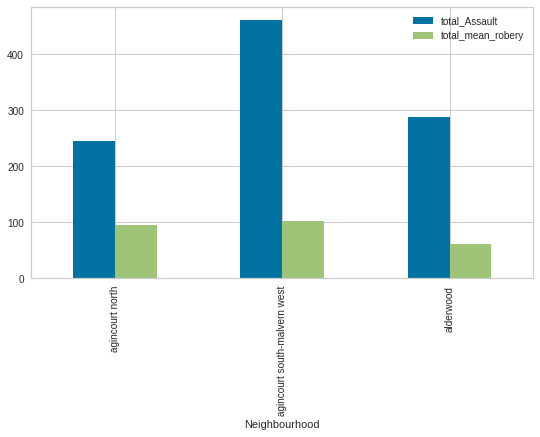

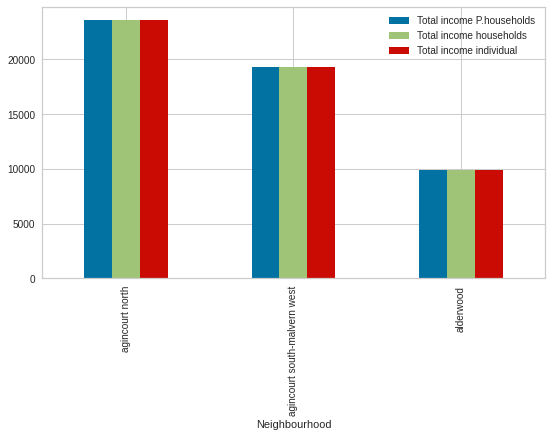

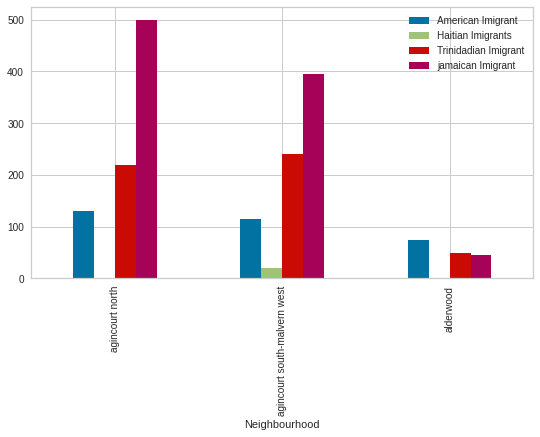

In [191]:
second_pivot1.iloc[:3,].plot(kind='bar',figsize=(9,5))
income_pivot1.iloc[:3,].plot(kind='bar',figsize=(9,5))
first_pivot1.iloc[:3,].plot(kind='bar',figsize=(9,5))

# Data Analysis
Explore the dataset to discover relationships between records or columns and patterns within the data.

## Descriptive Statistical Analysis
Using basic statistical measures such as measurements of central tendancy such as mean, median and mode.

### Distribution of Variables
Identify the distribution of the data to understand the range of values and how the data is structured.

### Outliers in the dataset
Identify if there are any outliers in the dataset based on statistical measures.

In [192]:
merge_1

,ATM,Neighbourhood,Longitude,Latitude,Accessories Store,Boutique,Bridal Shop,Bus Stop,Bus Station,Bus Line,Department Store,Men's Store,Dessert Shop,Hobby Shop,Lingerie Store,Shopping Mall,Thrift / Vintage Store,Male age:20 to 24 years,Female age:20 to 24 years,Total income P.households,Total income households,Total income individual,Haitian Imigrants,jamaican Imigrant,Trinidadian Imigrant,total_Assault,total_mean_robery,American Imigrant
0,0,agincourt north,-79.264542,43.804733,0,0,0,0,0,0,0,0,0,0,0,0,0,1015,975,23620,23635,23635,0,500,220,244.798486,94.582293,130
1,0,agincourt south-malvern west,-79.260509,43.789325,0,0,0,0,0,0,0,0,0,0,0,1,0,1000,895,19295,19295,19290,20,395,240,462.185571,102.594551,115
2,0,alderwood,-79.545571,43.603581,0,0,0,0,0,0,0,0,0,0,0,0,0,355,310,9930,9930,9920,0,45,50,287.495757,61.767394,75
3,0,annex,-79.399974,43.671030,0,0,0,0,0,0,0,0,0,0,0,0,0,1215,1520,25680,25685,25660,0,175,80,833.750386,152.495671,780
4,0,banbury-don mills,-79.347042,43.733355,1,0,0,0,0,0,0,0,0,0,0,1,0,700,650,22390,22390,22390,0,220,225,276.324557,46.386083,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0,wychwood,-79.425757,43.677056,0,0,0,0,0,0,0,0,0,0,0,0,0,385,425,11005,11000,11000,0,210,85,457.792814,96.485607,205
132,0,yonge-eglinton,-79.401295,43.700041,0,0,0,0,0,0,0,0,0,0,0,0,0,345,380,9590,9595,9595,10,30,40,575.257800,124.057574,210
133,0,yonge-st.clair,-79.394588,43.687481,0,0,0,0,0,0,0,0,0,0,0,0,0,260,350,10900,10905,10895,0,50,25,199.896486,23.630162,325
134,0,york university heights,-79.489869,43.763076,0,0,0,0,0,0,0,0,0,0,0,0,0,1615,1395,22265,22270,22265,35,1115,200,1158.416729,251.738357,120


In [193]:
X = merge_1.drop(columns=['Neighbourhood','Longitude','Latitude'])

In [194]:
X.head()

,ATM,Accessories Store,Boutique,Bridal Shop,Bus Stop,Bus Station,Bus Line,Department Store,Men's Store,Dessert Shop,Hobby Shop,Lingerie Store,Shopping Mall,Thrift / Vintage Store,Male age:20 to 24 years,Female age:20 to 24 years,Total income P.households,Total income households,Total income individual,Haitian Imigrants,jamaican Imigrant,Trinidadian Imigrant,total_Assault,total_mean_robery,American Imigrant
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1015,975,23620,23635,23635,0,500,220,244.798486,94.582293,130
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1000,895,19295,19295,19290,20,395,240,462.185571,102.594551,115
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,355,310,9930,9930,9920,0,45,50,287.495757,61.767394,75
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1215,1520,25680,25685,25660,0,175,80,833.750386,152.495671,780
4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,700,650,22390,22390,22390,0,220,225,276.324557,46.386083,300


In [195]:
cols = X.columns

In [196]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

data= ms.fit_transform(X)

In [197]:
X= pd.DataFrame(data=data,columns=cols)

In [198]:
X

,ATM,Accessories Store,Boutique,Bridal Shop,Bus Stop,Bus Station,Bus Line,Department Store,Men's Store,Dessert Shop,Hobby Shop,Lingerie Store,Shopping Mall,Thrift / Vintage Store,Male age:20 to 24 years,Female age:20 to 24 years,Total income P.households,Total income households,Total income individual,Haitian Imigrants,jamaican Imigrant,Trinidadian Imigrant,total_Assault,total_mean_robery,American Imigrant
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285959,0.234261,0.335639,0.335759,0.335788,0.000000,0.232057,0.197183,0.038187,0.126873,0.139073
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.280822,0.210835,0.257949,0.257792,0.257746,0.102564,0.181818,0.215962,0.134009,0.141200,0.119205
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.059932,0.039531,0.089725,0.089554,0.089448,0.000000,0.014354,0.037559,0.057008,0.068195,0.066225
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.354452,0.393851,0.372642,0.372586,0.372160,0.000000,0.076555,0.065728,0.297790,0.230431,1.000000
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.178082,0.139092,0.313544,0.313393,0.313426,0.000000,0.098086,0.201878,0.052084,0.040691,0.364238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070205,0.073206,0.109035,0.108776,0.108846,0.000000,0.093301,0.070423,0.132073,0.130277,0.238411
128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056507,0.060029,0.083618,0.083535,0.083610,0.051282,0.007177,0.028169,0.183850,0.179579,0.245033
129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027397,0.051245,0.107149,0.107069,0.106960,0.000000,0.016746,0.014085,0.018395,0.000000,0.397351
130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.491438,0.357247,0.311299,0.311237,0.311181,0.179487,0.526316,0.178404,0.440899,0.407892,0.125828


In [199]:
!pip install yellowbrick

In [200]:
!pip install kMeans

In [201]:
from sklearn.cluster import KMeans

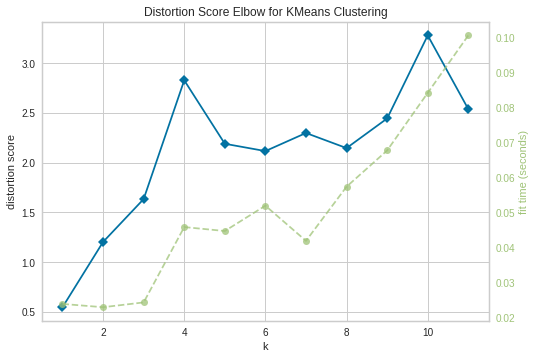

In [202]:
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()

visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.poof()        # Finalize and render the figure

In [203]:
distances = []
nbr_clusters = []
for k in range (1,12):
 komean= KMeans(n_clusters=k)
 komean.fit(merge_1.drop(columns="Neighbourhood"))
 nbr_clusters.append(k)
 distances.append(komean.inertia_)


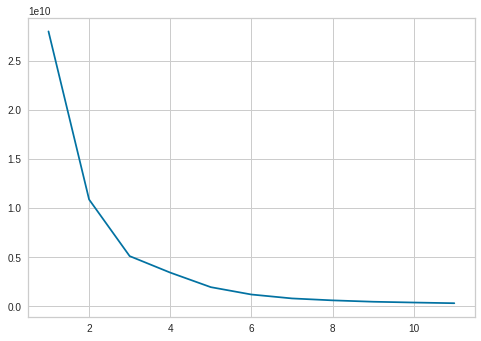

In [204]:
sns.lineplot(x=nbr_clusters,y=distances)

In [205]:
kmeans = KMeans(n_clusters=3) 

kmeans.fit(data)
labels=kmeans.labels_



In [206]:
X['labels']=labels

In [207]:
!pip install plotly

In [208]:
first_label=X[X.labels== 0]#.loc["Haitian Imigrants","jamaican Imigrant","Trinidadian Imigrant","American Imigrant"].mean()
second_label=X[X.labels== 1]
third_label=X[X.labels== 2]

In [209]:
merge_1['labels'] = labels

In [210]:
imigrant=merge_1.groupby('labels')[['Haitian Imigrants','jamaican Imigrant','Trinidadian Imigrant']].sum()
imigrant.reset_index(inplace=True)
imigrant

,labels,Haitian Imigrants,jamaican Imigrant,Trinidadian Imigrant
0,0,660,15810,6255
1,1,490,6020,3030
2,2,655,22340,9740


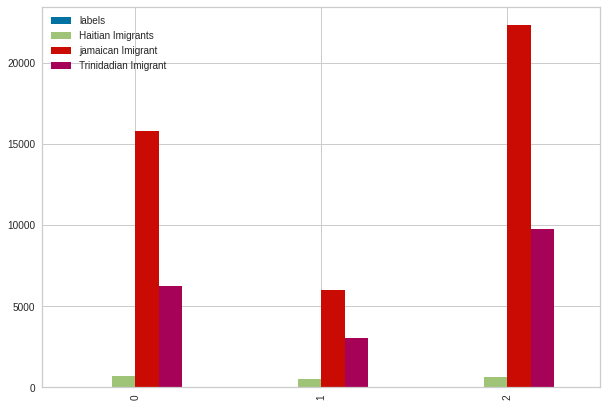

In [211]:
imigrant.plot(kind='bar',figsize=(10,7))

In [212]:
safety=merge_1.groupby('labels')[['total_Assault','total_mean_robery']].sum()
safety.reset_index(inplace=True)
safety

,labels,total_Assault,total_mean_robery
0,0,11866.411986,2306.310344
1,1,18130.159600,3476.743104
2,2,51774.791114,10271.383319


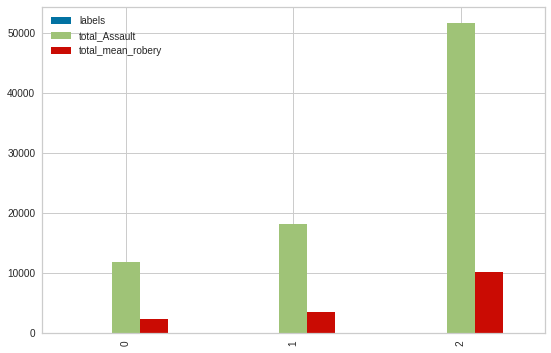

In [213]:
safety.plot(kind='bar',figsize=(9,6))

In [214]:
total_age=merge_1.groupby('labels')[['Male age:20 to 24 years','Female age:20 to 24 years']].sum()
total_age.reset_index(inplace=True)
total_age

,labels,Male age:20 to 24 years,Female age:20 to 24 years
0,0,26855,26975
1,1,15655,16465
2,2,50785,49810


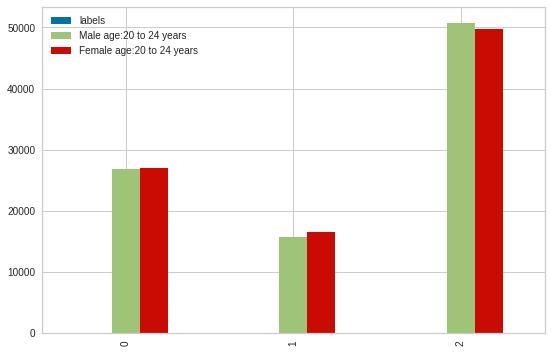

In [215]:
total_age.plot(kind='bar',figsize=(9,6))

In [216]:
income=merge_1.groupby('labels')[['Total income P.households','Total income households','Total income individual']].mean()
income.reset_index(inplace=True)
income

,labels,Total income P.households,Total income households,Total income individual
0,0,31835.882353,31840.588235,31839.705882
1,1,17623.611111,17626.111111,17624.444444
2,2,12620.824742,12623.195876,12621.185567


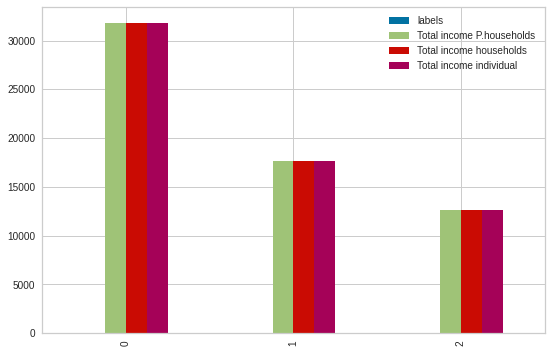

In [217]:
income.plot(kind='bar',figsize=(9,6))

In [218]:
mgg = merge_1.groupby('labels')[["ATM","Shopping Mall","Men's Store","Bus Stop","Department Store","Thrift / Vintage Store"]].sum()
mgg.reset_index(inplace=True)
mgg

,labels,ATM,Shopping Mall,Men's Store,Bus Stop,Department Store,Thrift / Vintage Store
0,0,1,1,0,2,0,0
1,1,0,14,1,2,5,5
2,2,1,2,1,3,1,0


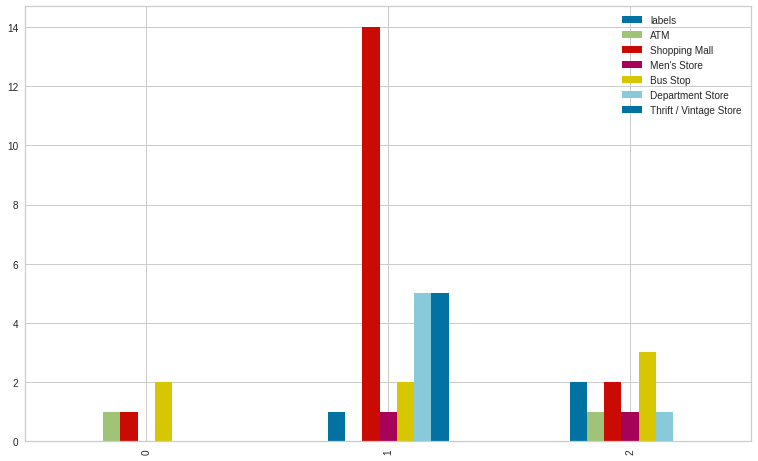

In [219]:
mgg.plot(kind='bar',figsize=(13,8))

In [220]:
merge_1.groupby('labels')['total_Assault'].mean().to_frame()

,total_Assault
labels,
0,698.024234
1,1007.231089
2,533.760733


In [221]:
first_label.describe()

,ATM,Accessories Store,Boutique,Bridal Shop,Bus Stop,Bus Station,Bus Line,Department Store,Men's Store,Dessert Shop,Hobby Shop,Lingerie Store,Shopping Mall,Thrift / Vintage Store,Male age:20 to 24 years,Female age:20 to 24 years,Total income P.households,Total income households,Total income individual,Haitian Imigrants,jamaican Imigrant,Trinidadian Imigrant,total_Assault,total_mean_robery,American Imigrant,labels
count,17.000000,17.0,17.0,17.0,17.000000,17.0,17.0,17.0,17.0,17.000000,17.0,17.0,17.000000,17.0,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0
mean,0.058824,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.029412,0.0,0.0,0.029412,0.0,0.479351,0.413401,0.483220,0.483169,0.483156,0.199095,0.437799,0.336095,0.237964,0.200336,0.310869,0.0
std,0.242536,0.0,0.0,0.0,0.242536,0.0,0.0,0.0,0.0,0.121268,0.0,0.0,0.121268,0.0,0.181454,0.174207,0.172957,0.172956,0.172964,0.236491,0.307050,0.254768,0.116530,0.110003,0.272817,0.0
min,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.239726,0.284041,0.311299,0.311237,0.311181,0.000000,0.076555,0.065728,0.060222,0.045635,0.079470,0.0
25%,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.357877,0.316252,0.372642,0.372586,0.372160,0.051282,0.174641,0.183099,0.136884,0.115968,0.125828,0.0
50%,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.414384,0.360176,0.413059,0.413096,0.413022,0.128205,0.461722,0.239437,0.231494,0.201115,0.231788,0.0
75%,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.544521,0.420205,0.557122,0.556903,0.556982,0.256410,0.681818,0.366197,0.297790,0.255372,0.350993,0.0
max,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.500000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.871795,1.000000,1.000000,0.440899,0.407892,1.000000,0.0


In [222]:
second_label.describe()

,ATM,Accessories Store,Boutique,Bridal Shop,Bus Stop,Bus Station,Bus Line,Department Store,Men's Store,Dessert Shop,Hobby Shop,Lingerie Store,Shopping Mall,Thrift / Vintage Store,Male age:20 to 24 years,Female age:20 to 24 years,Total income P.households,Total income households,Total income individual,Haitian Imigrants,jamaican Imigrant,Trinidadian Imigrant,total_Assault,total_mean_robery,American Imigrant,labels
count,18.0,18.000000,18.000000,18.0,18.000000,18.0,18.0,18.000000,18.000000,18.000000,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0
mean,0.0,0.111111,0.055556,0.0,0.055556,0.0,0.0,0.138889,0.055556,0.166667,0.0,0.083333,0.388889,0.277778,0.236206,0.216610,0.227925,0.227811,0.227830,0.139601,0.152844,0.148670,0.374258,0.303131,0.243561,1.0
std,0.0,0.323381,0.235702,0.0,0.161690,0.0,0.0,0.287257,0.235702,0.342997,0.0,0.257248,0.274159,0.460889,0.186405,0.198214,0.097488,0.097524,0.097465,0.302140,0.155328,0.099371,0.317440,0.255026,0.155304,0.0
min,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.047945,0.058565,0.070684,0.070601,0.070678,0.000000,0.016746,0.037559,0.052084,0.040691,0.000000,1.0
25%,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.125000,0.000000,0.122003,0.102489,0.146331,0.146232,0.146273,0.000000,0.040072,0.076291,0.118154,0.143920,0.149007,1.0
50%,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.500000,0.000000,0.190068,0.174231,0.222831,0.222671,0.222721,0.051282,0.098086,0.133803,0.244747,0.227132,0.201987,1.0
75%,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.500000,0.750000,0.273973,0.220717,0.301397,0.301222,0.301257,0.089744,0.205144,0.205399,0.505300,0.330443,0.344371,1.0
max,0.0,1.000000,1.000000,0.0,0.500000,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.789384,0.828697,0.421232,0.421270,0.421105,1.000000,0.564593,0.450704,1.000000,1.000000,0.609272,1.0


In [223]:
third_label.describe()

,ATM,Accessories Store,Boutique,Bridal Shop,Bus Stop,Bus Station,Bus Line,Department Store,Men's Store,Dessert Shop,Hobby Shop,Lingerie Store,Shopping Mall,Thrift / Vintage Store,Male age:20 to 24 years,Female age:20 to 24 years,Total income P.households,Total income households,Total income individual,Haitian Imigrants,jamaican Imigrant,Trinidadian Imigrant,total_Assault,total_mean_robery,American Imigrant,labels
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.0,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.0
mean,0.010309,0.010309,0.010309,0.010309,0.015464,0.030928,0.025773,0.005155,0.010309,0.051546,0.010309,0.005155,0.010309,0.0,0.117656,0.099123,0.138060,0.137936,0.137965,0.034629,0.103019,0.084894,0.165558,0.147094,0.165973,2.0
std,0.101535,0.101535,0.101535,0.101535,0.087011,0.174022,0.132507,0.050767,0.101535,0.169013,0.101535,0.050767,0.071421,0.0,0.071809,0.056449,0.079891,0.079923,0.079903,0.066929,0.116003,0.070594,0.115331,0.101597,0.147904,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.063356,0.051245,0.078229,0.077966,0.078042,0.000000,0.028708,0.032864,0.077018,0.066841,0.066225,2.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.106164,0.096633,0.123406,0.123147,0.123215,0.000000,0.059809,0.070423,0.155443,0.128722,0.125828,2.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.155822,0.134700,0.184660,0.184676,0.184553,0.051282,0.133971,0.112676,0.228839,0.209486,0.225166,2.0
max,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,0.500000,0.500000,0.0,0.291096,0.234261,0.335639,0.335759,0.335788,0.487179,0.674641,0.422535,0.682711,0.544136,0.867550,2.0


In [224]:
merge_1.head()

,ATM,Neighbourhood,Longitude,Latitude,Accessories Store,Boutique,Bridal Shop,Bus Stop,Bus Station,Bus Line,Department Store,Men's Store,Dessert Shop,Hobby Shop,Lingerie Store,Shopping Mall,Thrift / Vintage Store,Male age:20 to 24 years,Female age:20 to 24 years,Total income P.households,Total income households,Total income individual,Haitian Imigrants,jamaican Imigrant,Trinidadian Imigrant,total_Assault,total_mean_robery,American Imigrant,labels
0,0,agincourt north,-79.264542,43.804733,0,0,0,0,0,0,0,0,0,0,0,0,0,1015,975,23620,23635,23635,0,500,220,244.798486,94.582293,130,2
1,0,agincourt south-malvern west,-79.260509,43.789325,0,0,0,0,0,0,0,0,0,0,0,1,0,1000,895,19295,19295,19290,20,395,240,462.185571,102.594551,115,1
2,0,alderwood,-79.545571,43.603581,0,0,0,0,0,0,0,0,0,0,0,0,0,355,310,9930,9930,9920,0,45,50,287.495757,61.767394,75,2
3,0,annex,-79.399974,43.671030,0,0,0,0,0,0,0,0,0,0,0,0,0,1215,1520,25680,25685,25660,0,175,80,833.750386,152.495671,780,0
4,0,banbury-don mills,-79.347042,43.733355,1,0,0,0,0,0,0,0,0,0,0,1,0,700,650,22390,22390,22390,0,220,225,276.324557,46.386083,300,1


In [225]:
inverse_crimes =1/merge_1['total_Assault']


In [226]:
revenue=(merge_1['Total income individual']-merge_1['Total income individual'].min())/(merge_1['Total income individual'].max()-merge_1['Total income individual'].min())

In [227]:
population=(merge_1['Male age:20 to 24 years'])+(merge_1['Female age:20 to 24 years'])

In [228]:
Pop=(population-population.min())/(population.max()-population.min())


In [229]:
#H_imigrant=(Haitian Imigrants-Haitian Imigrants.min())/(Haitian Imigrants.max()-Haitian Imigrants())
H_imigrant=(merge_1['Haitian Imigrants']-merge_1['Haitian Imigrants'].min())/ (merge_1['Haitian Imigrants'].max()-merge_1['Haitian Imigrants'].min())

In [230]:
merge_1['Score']=inverse_crimes+revenue+Pop+2*H_imigrant

In [231]:
score_=merge_1[['Neighbourhood','Score']].sort_values("Score", ascending=False)

In [232]:
score_

,Neighbourhood,Score
77,mount olive-silverstone-jamestown,2.445660
119,west hill,2.388985
69,malvern,2.281039
104,scarborough village,2.266917
118,waterfront communities-the island,2.103456
...,...,...
37,elms-old rexdale,0.100365
27,danforth,0.071738
89,old east york,0.062696
14,blake-jones,0.029570


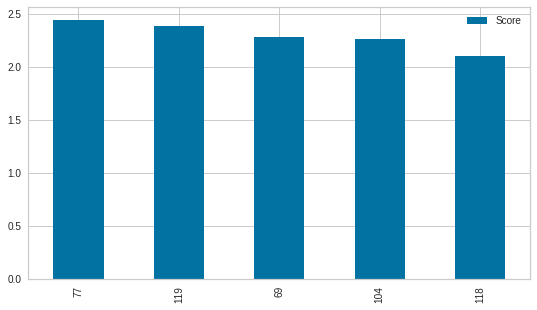

In [233]:
score_.sort_values("Score", ascending=False).iloc[:5,].plot(kind='bar',figsize=(9,5))

In [234]:
merge_1.head()

,ATM,Neighbourhood,Longitude,Latitude,Accessories Store,Boutique,Bridal Shop,Bus Stop,Bus Station,Bus Line,Department Store,Men's Store,Dessert Shop,Hobby Shop,Lingerie Store,Shopping Mall,Thrift / Vintage Store,Male age:20 to 24 years,Female age:20 to 24 years,Total income P.households,Total income households,Total income individual,Haitian Imigrants,jamaican Imigrant,Trinidadian Imigrant,total_Assault,total_mean_robery,American Imigrant,labels,Score
0,0,agincourt north,-79.264542,43.804733,0,0,0,0,0,0,0,0,0,0,0,0,0,1015,975,23620,23635,23635,0,500,220,244.798486,94.582293,130,2,0.595613
1,0,agincourt south-malvern west,-79.260509,43.789325,0,0,0,0,0,0,0,0,0,0,0,1,0,1000,895,19295,19295,19290,20,395,240,462.185571,102.594551,115,1,0.705734
2,0,alderwood,-79.545571,43.603581,0,0,0,0,0,0,0,0,0,0,0,0,0,355,310,9930,9930,9920,0,45,50,287.495757,61.767394,75,2,0.138848
3,0,annex,-79.399974,43.671030,0,0,0,0,0,0,0,0,0,0,0,0,0,1215,1520,25680,25685,25660,0,175,80,833.750386,152.495671,780,0,0.747073
4,0,banbury-don mills,-79.347042,43.733355,1,0,0,0,0,0,0,0,0,0,0,1,0,700,650,22390,22390,22390,0,220,225,276.324557,46.386083,300,1,0.471439


In [235]:
last_pivot=pd.pivot_table(merge_1,index='Score',values=['labels'])

In [236]:
last_pivot=pd.pivot_table(merge_1,index='labels',values=['Score'],aggfunc='mean')

In [237]:
last_pivot

,Score
labels,
0,1.325062
1,0.731758
2,0.314439


In [238]:
profile_final_merge.rename(columns={'Age characteristics Female: 20 to 24 years':'Female age:20 to 24 years','Age characteristics Male: 20 to 24 years':'Male age:20 to 24 years'},inplace = True)

In [239]:
data_of_geo = gpd.read_file('Neighbourhoods.shp')

In [240]:
data_of_geo.head(3)

,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_11,FIELD_12,FIELD_13,FIELD_14,FIELD_15,geometry
0,141,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),None,None,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"POLYGON ((309967.120 4837586.769, 310047.783 4..."
1,142,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),None,None,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"POLYGON ((311976.621 4840247.041, 312084.257 4..."
2,143,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),None,None,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"POLYGON ((313572.832 4837693.591, 313555.868 4..."


In [241]:
merge_1.head(2)

,ATM,Neighbourhood,Longitude,Latitude,Accessories Store,Boutique,Bridal Shop,Bus Stop,Bus Station,Bus Line,Department Store,Men's Store,Dessert Shop,Hobby Shop,Lingerie Store,Shopping Mall,Thrift / Vintage Store,Male age:20 to 24 years,Female age:20 to 24 years,Total income P.households,Total income households,Total income individual,Haitian Imigrants,jamaican Imigrant,Trinidadian Imigrant,total_Assault,total_mean_robery,American Imigrant,labels,Score
0,0,agincourt north,-79.264542,43.804733,0,0,0,0,0,0,0,0,0,0,0,0,0,1015,975,23620,23635,23635,0,500,220,244.798486,94.582293,130,2,0.595613
1,0,agincourt south-malvern west,-79.260509,43.789325,0,0,0,0,0,0,0,0,0,0,0,1,0,1000,895,19295,19295,19290,20,395,240,462.185571,102.594551,115,1,0.705734


In [242]:

data_of_geo = gpd.read_file('Neighbourhoods.shp')

In [243]:
data_of_geo['x']=data_of_geo.geometry.centroid.x
data_of_geo['y'] =data_of_geo.geometry.centroid.y

In [244]:
data_of_geo.head(3)

,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_11,FIELD_12,FIELD_13,FIELD_14,FIELD_15,geometry,x,y
0,141,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),None,None,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"POLYGON ((309967.120 4837586.769, 310047.783 4...",310806.056727,4.837228e+06
1,142,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),None,None,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"POLYGON ((311976.621 4840247.041, 312084.257 4...",312570.362023,4.840315e+06
2,143,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),None,None,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"POLYGON ((313572.832 4837693.591, 313555.868 4...",313033.631906,4.838446e+06


In [245]:
graph_geo=pd.concat([data_of_geo,merge_1],axis=1).reindex(data_of_geo.index)

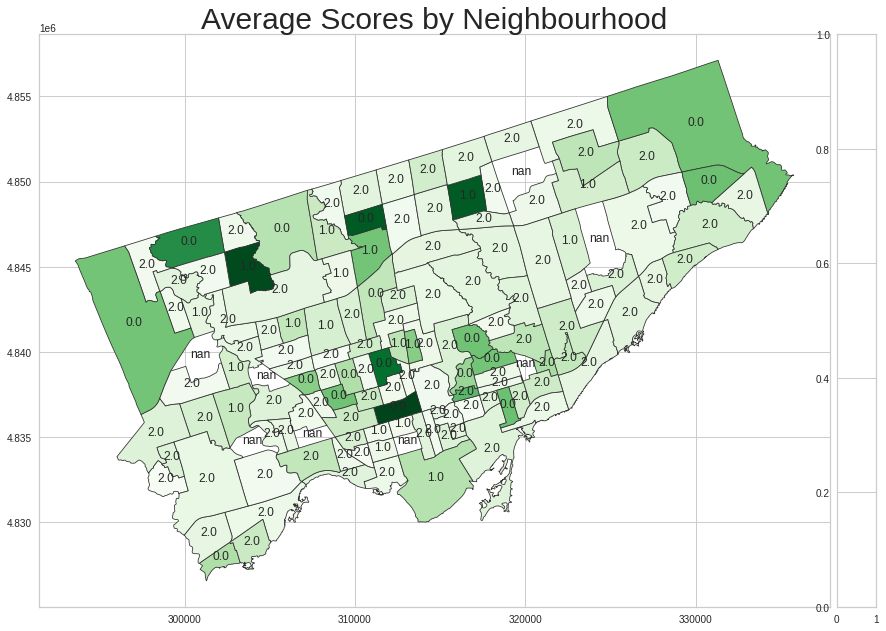

In [267]:
# import labrairie to make locatable axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
# draws choropleth map
fig, ax = plt.subplots(1, 1,figsize =(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
ax =graph_geo.plot(column='Score', cmap='Greens', linewidth=0.8, edgecolor='0.2',legend=False, ax=ax,cax = cax)
ax.set_title('Average Scores by Neighbourhood',fontsize =30)

graph_geo.apply(lambda x: ax.annotate(s=x['labels'], xy=x.geometry.centroid.coords[0], ha='center'),axis=1);

# Reflections
## Summary of Data Analysis
- What insights should the user takeaway from EDA.

## Questions unanswered
- What aspects of the research question were we unable to answer and why?

## Recommendations
- What should the reader do next with this information?

## Next Steps
- What will the analyst do next based on the analysis?

Through the reader's Chart they can see which areas have the lowest roberry and assault rates
, they can look at the income of neighborhood residents, which neighborhood has the highest youth population, as these factors are very important to the brand.

Recommendations:

1.   Select the first three cities because they have the best score.   






